# Logistic Regression Analysis on Titanic Dataset

### 1. Prepare Data

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv('datafiles/titanic_train.csv')
test = pd.read_csv('datafiles/titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(f"Train shape: {train.shape} \nTest shape: {test.shape}")

Train shape: (891, 12) 
Test shape: (418, 11)


In [19]:
# We only want columns relevant for our logistic regression model to read in. 
keep_cols_train = ['Survived', 'Pclass', 'Sex', 'Age', "Fare"]
keep_cols_test = ['Pclass', 'Sex', 'Age', "Fare"]

<AxesSubplot:xlabel='Sex', ylabel='count'>

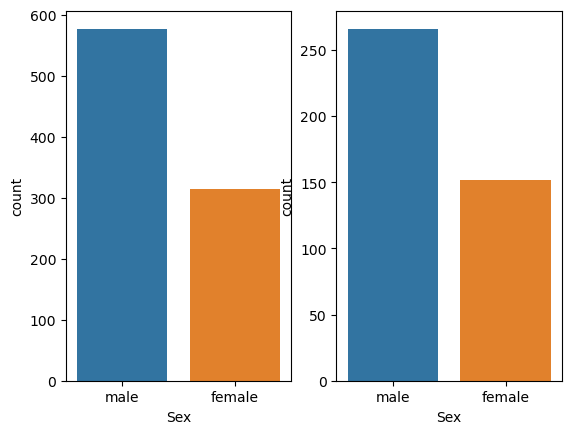

In [8]:
# Visualize what we are working with
fig, ax =plt.subplots(1,2)
sns.countplot(x='Sex', data=train, ax=ax[0])
sns.countplot(x='Sex', data=test, ax=ax[1])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

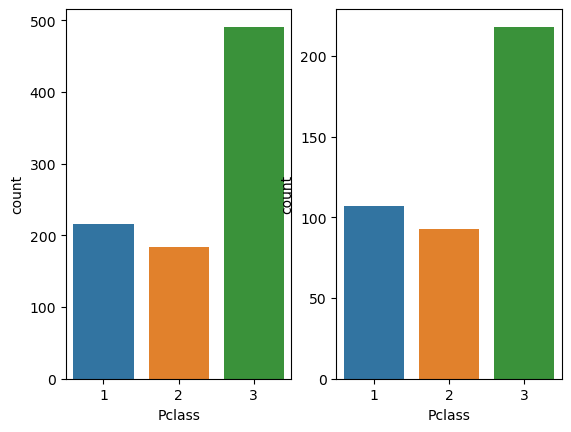

In [9]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Pclass', data=train, ax=ax[0])
sns.countplot(x='Pclass', data=test, ax=ax[1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

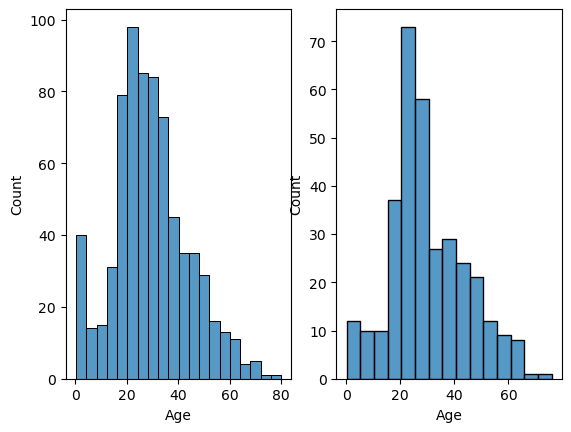

In [13]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='Age', data=train, ax=ax[0])
sns.histplot(x='Age', data=test, ax=ax[1])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

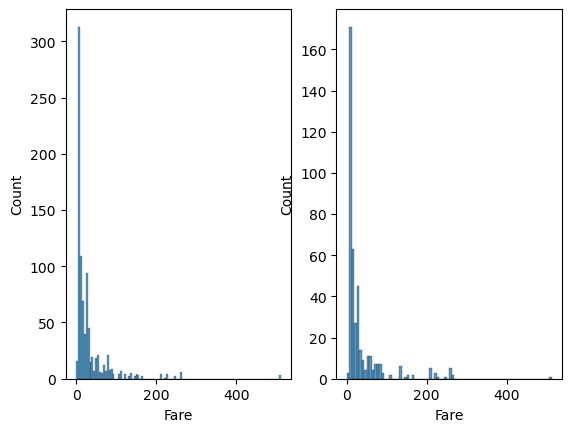

In [21]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='Fare', data=train, ax=ax[0])
sns.histplot(x='Fare', data=test, ax=ax[1])

In [23]:
train[keep_cols_train].describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [24]:
for ii in keep_cols_train:
    sum_na = train[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")
    
for ii in keep_cols_test:
    sum_na = test[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")

Survived: 0 # of NaN values.
Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 177 # of NaN values.
Fare: 0 # of NaN values.
Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 86 # of NaN values.
Fare: 1 # of NaN values.


In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

NameError: name 'np' is not defined